### These are my solutions to the Tasks assessments.  Rebecca Turley (G00376344@gmit.ie) 
***

### Task 1: 
***
##### October 5th, 2020: Write a Python function called sqrt2 that calculates and prints to the screen the square root of 2 to 100 decimal places. Your code should not depend on any module from the standard library or otherwise. You should  research the task first and include references and a description of your algorithm. 

First, let's create a plot of what the square root should look like and see if it gives an idea as to what the square root of 2 is. Below are 1000 numbers evenly spaced out between 0 and 10.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(0.0, 10, 1000)
x

array([ 0.        ,  0.01001001,  0.02002002,  0.03003003,  0.04004004,
        0.05005005,  0.06006006,  0.07007007,  0.08008008,  0.09009009,
        0.1001001 ,  0.11011011,  0.12012012,  0.13013013,  0.14014014,
        0.15015015,  0.16016016,  0.17017017,  0.18018018,  0.19019019,
        0.2002002 ,  0.21021021,  0.22022022,  0.23023023,  0.24024024,
        0.25025025,  0.26026026,  0.27027027,  0.28028028,  0.29029029,
        0.3003003 ,  0.31031031,  0.32032032,  0.33033033,  0.34034034,
        0.35035035,  0.36036036,  0.37037037,  0.38038038,  0.39039039,
        0.4004004 ,  0.41041041,  0.42042042,  0.43043043,  0.44044044,
        0.45045045,  0.46046046,  0.47047047,  0.48048048,  0.49049049,
        0.5005005 ,  0.51051051,  0.52052052,  0.53053053,  0.54054054,
        0.55055055,  0.56056056,  0.57057057,  0.58058058,  0.59059059,
        0.6006006 ,  0.61061061,  0.62062062,  0.63063063,  0.64064064,
        0.65065065,  0.66066066,  0.67067067,  0.68068068,  0.69

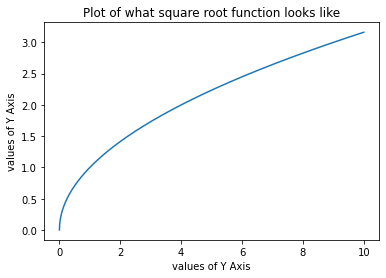

In [2]:
plt.title("Plot of what square root function looks like")
plt.xlabel('values of Y Axis')
plt.ylabel('values of Y Axis')
y = np.sqrt(x)
plt.plot(x,y)
plt.show()


The above is what the square root function looks like.  It is a little small but looking at the 2 on the bottom of the graph (x axis) it aligns up along the y axis to a little under 1.5.  Therefore, we can say that we expect the square root of 2 to be slightly less than 1.5

I have decided to look into using the Newton-Raphson method to try and solve the task.  It is based on the idea of linear approximation to produce successively better approximations to the roots. [1] 


$$ x_{1} = x_{0} - \frac{f( x_{0})} {f^1( x_{0})} $$



The square root of a number is the number which when multiplied by itself results in the initial number chosen. e.g. 3 is the square root of 9 as 3*3=9.  

There are three parts to the process. 
1. Guess 
2. Divide 
3. Average. 

Then parts two and three are repeated in a loop.  

Begin by making an attempt to guess the square root of a number.  Obviously, a good guess is better than a bad one but regardless, the method will work. If the initial guess is a good one it will shorten the iteration process. 

e.g. In trying to get the square root of 10 my guess is 2.  

Next part is to divide, so divide 10 by 2 and the result is 5. 

Third part is to average 5 and 2 = 7 / 2 = 3.5.  

Now repeat second part with new guess of 3.5 so 10 /3.5 =2.85.  Average of 3.5 + 2.85 = 3.175.  

Repeat second part; 10 / 3.175 = 3.149. 

Average of 3.175 + 3.149 = 3.162. 

This could continue, getting a nearer approximation with each iteration. 

To see how close I am with 3.162 multiply it by itself to square it. 3.162 * 3.162 = 9.998. 
Initial number was 10.

In [3]:
# [2] Code from https://stackoverflow.com/questions/59844613/sqrt-using-any-method-f-e-newton-but-with-fixed-number-of-digits-after-separa
import decimal

def square_root(num, P):
    # need to set the decimal precision to more than enough digits to handle the full calculation
    # (the number of decimal places, plus the number of digits in the original number, 
    # should be enough - this counts the numbers both before and after the decimal point)
    # I add +2 to give some room to spare, as well
    decimal.getcontext().prec = P + len(str(num)) + 2
    # now, do the algorithm you have, except with everything as fixed-point Decimal objects
    x = decimal.Decimal(num)
    y = decimal.Decimal(1)
    e = decimal.Decimal(10) ** decimal.Decimal(-P)
    # important: I changed this to >= so that it runs when P=0.
    # Otherwise we output 2 when P=0, when we should output 1.
    while (x - y >= e):
        x = (x + y) / 2
        y = num / x
    # now, truncate to exactly the desired number of digits
    # this is straightforward - we can just use the built-in `round()` method with P
    # we subtract e/2 to simulate always rounding down, since round() simply rounds to closest.
    return round(x - (e / 2), P)

square_root(2, 0)
print (square_root(2, 100))


# In the decimal example above, I allowed it to use enough memory to be accurate to about 100 decimal places so there is no long string of zeroes half way through. 
#If decimal were to be imported, it would make the task a lot easier.  Unfortunately, it isn't the case so the search continues.

1.4142135623730950488016887242096980785696718753769480731766797379907324784621070388503875343276415727


In [4]:
import math
math.sqrt(2)
format(math.sqrt(2), '.100f')


'1.4142135623730951454746218587388284504413604736328125000000000000000000000000000000000000000000000000'

Here I tried to calculate to 100 places but as can be seen from the output above, all the figures from approximately half way through the requested number of places resolve into zeros.<br>
This is due to a limitation in floating point arithmetic errors where decimal values stored as a formula and as such does not have an exact representation.<br>
The math prints out a number that is close to 53 digits before becoming all zeroes because the floating point math is (very basically) defined as some numerator divided by 2****53**.
<br>Where by the number has "precision" of approximately 50ish decimal digits, but it's not accurate to that many digits because the numerator itself has too few digits (less than 64-bits worth, an actual 100-digit decimal number would require hundreds of bits to store).  It is showing all the possible decimal digits of the number that is closest to the actual square-root of 70 when represented as a 64-bit binary floating point value. It is discussed in the python documents. [3]

In [5]:
# [4] https://stackoverflow.com/questions/46183020/square-root-without-pre-defined-function-in-python

def sqrt2(n):
    """
    A function to calculate the square root of a number x.
    """
    x=n
    y=1.000000 #iteration initialisation.
    e=0.000001 #accuracy after decimal place.
    # Loop until we are happy with the accuracy. While the difference between x and y is greater than 0.000001
    while x-y > e:
        # Calculate x and y through each iteration of the loop until the difference between x and y reaches the value of e.
        x=(x+y)/2
        y=n/x
    # Return approximate square root of x.
    return (x)

n = 2

print (sqrt2(2))

s = sqrt2(n)



# [5] https://www.geeksforgeeks.org/precision-handling-python/
# [6] https://mkaz.blog/code/python-string-format-cookbook/  
# [7]http://anh.cs.luc.edu/python/hands-on/3.1/handsonHtml/float.html
# Prints square root to 100 decimal places
a = format(s, ".100f")


print (a)




1.4142135623746899
1.4142135623746898698271934335934929549694061279296875000000000000000000000000000000000000000000000000


The first result above is the result of a calculation of the square root of 2 without importing any additional libraries but only does so to 16 places.  This is due to limitation within Python's floating point arithmetic. [3] and the 16th place may be inaccurate. [8] https://www.programiz.com/python-programming/numbers

The second result does not solve the task as it results in the last half of the result just being made up of 0's.  This is the result of format being used and the limit of floating-point precision which only displays more digits but that doesn't make the underlying value more precise.   The internal representation of floating point numbers relies on a fixed number of binary digits to represent a decimal number.  Some decimal numbers can't be represented exactly in binary, resulting in small roundoff errors. http://effbot.org/pyfaq/why-are-floating-point-calculations-so-inaccurate.htm

In [6]:
#Working on the function sqrt2(n) from earlier. # [3] 
def sqrt2(n):
    x=n
    y=1.000000 #iteration initialisation.
    e=0.000001 #accuracy after decimal place.
    while x-y > e:
        x=(x+y)/2
        y=n/x
    return (x)

n = 2

#print (sqrt2(2))


print (sqrt2(2))

s = sqrt2(n)

a = format(s, ".0f")
print (a)

# body of the main function
def main():
    

    # d is the number of which the square root is to be calculated in this example it is 2
    # [10] https://www.tutorialspoint.com/How-to-perform-square-root-without-using-math-module-in-Python
    #Python has exponentiation operator (**) which can be used to calculate power of a number. x**y returns x raised to y i.e. y times multiplication of x. Since we need to calculate square root, y should be (1/2)
    sqrt  = 100 ** 200
    d =  2 * sqrt
    
    # [11] https://www.geeksforgeeks.org/convert-integer-to-string-in-python/
    # convert result of above to string
    #allstring = str(sqrt2(d)) - alternative method
    allstring = "% a" % (sqrt2(d))


    # [12] https://stackoverflow.com/questions/53976250/how-to-add-dot-separator-on-different-positions-of-a-number-in-python    
    # position the decimal place after the first digit
    result = allstring[0:1] + "."
        
    # [13] https://docs.python.org/2.3/whatsnew/section-slices.html
    # slice off the first 100 off the string
    for i in allstring[1:100]:
        result = result + i
    
 
    print(result)
                

        
# execute only if run as a script
if __name__ == '__main__':
    main()    

1.4142135623746899
1


OverflowError: int too large to convert to float

After reading the documentation at [3]  it suggested "For more pleasant output, you may wish to use string formatting to produce a limited number of significant digits" so that is what I attempted to do here.  However, the above code results in an OverflowError as it states the integer is too large to convert to float.  This happens regardless of whether I ask it to calculate it to just one digit, ignoring the decimal places altogether.  I had thought converting it to a string might solve the problem but it didn't seem to accept the output from the sqrt2 function.  I think the output may have too many numbers in it or is not able to display due to memory limitations so I search for a function which not cause the same overflow error.  

In [7]:
# [14] Code adapted from https://stackoverflow.com/questions/15390807/integer-square-root-in-python
def sqrt2(n):
    # N is the number of which the square root is to be calculated.  Take whats on the right of the equals and save it inside whats on the left.
    x = n
    # Y is equal to the initial n number entered, add one and divide by two disregarding remainder and rounding down to the nearest integer
    y = (x + 1) // 2 
    # Loop as long as y (original n entered plus one diveded by 2) is less than original n
    while y < x:
        x = y
        y = (x + n // x) // 2  # 
    return x # returns the largest integer x for which x * x does not exceed n.

#print(sqrt2(2))


# body of the main function
def main():
    

    # d is the number of which the square root is to be calculated in this example it is 2
    # [9] https://www.tutorialspoint.com/How-to-perform-square-root-without-using-math-module-in-Python
    #Python has exponentiation operator (**) which can be used to calculate power of a number. x**y returns x raised to y i.e. y times multiplication of x. Since we need to calculate square root, y should be (1/2)
    sqrt  = 100 ** 200
    d =  2 * sqrt
    
    # [10] https://www.geeksforgeeks.org/convert-integer-to-string-in-python/
    # convert result of above to string
    #allstring = str(sqrt2(d)) - alternative method
    allstring = "% s" % (sqrt2(d))


    # [11] https://stackoverflow.com/questions/53976250/how-to-add-dot-separator-on-different-positions-of-a-number-in-python    
    # position the decimal place after the first digit
    result = allstring[0:1] + "."
        
    # [12] https://docs.python.org/2.3/whatsnew/section-slices.html
    # slice off the first 100 off the string
    for i in allstring[1:100]:
        result = result + i
    
 
    print(result)
                

        
# execute only if run as a script
if __name__ == '__main__':
    main()    


1.414213562373095048801688724209698078569671875376948073176679737990732478462107038850387534327641572


## End Result

As per Robert Nemiroff (George Mason University and NASA Goddard Space Flight Center)
and checked by Jerry Bonnell (University Space Research Association and NASA
Goddard Space Flight Center), the first 100 digits of the square root of 2 is   **1.41421356237309504880168872420969807856967187537694807317667973799073247846210703885038753432764157273**       [15]  https://apod.nasa.gov/htmltest/gifcity/sqrt2.1mil



#### My results:

decimal (square_root(2, 100)) =  **1.4142135623730950488016887242096980785696718753769480731766797379907324784621070388503875343276415727**

math.sqrt(2) = **1.4142135623730951454746218587388284504413604736328125000000000000000000000000000000000000000000000000**

sqrt2(n)(without importing additional libraries) = **1.4142135623746899**

string conversion sqrt2(n) = **1.414213562373095048801688724209698078569671875376948073176679737990732478462107038850387534327641572**

After going through this task, I realised that depending on the level of accuracy required from the output, different results and calculation methods are permissible.  With the decimal calculation at the start, I asked it to calculate it to 100 places and it printed them.  With the math.sqrt it calculated but only to approximately 53 places.  The sqrt2(n)(without importing additional libraries) did so to its default maximum number of places of 16.  The only way around it I could find was to convert the output to a string and then cut off the number of decimal places I want.  The number is identical to the number calculated by NASA.

For most day to day functions and calculations, the shorter numbers would be satisfactory but I can imagine where in the likes of cryptography, precision would be of the utmost importance.  On a side note, none of the calculations above take into account computation time. 

#### While trying to understand and research the task I used the following references.  Where applicable, I have referenced in the relivant sections.  The others I have read and watched in the course of my investigations. 

[1] Wikipedia, (2020), Newton's method: https://en.wikipedia.org/wiki/Newton%27s_method, accessed October 2020.<br>
[2] Green Cloak Guy, (2020), stackoverflow.com, SQRT using any method (f.e. Newton) but with fixed number of digits after separatorCode from https://stackoverflow.com/questions/59844613/sqrt-using-any-method-f-e-newton-but-with-fixed-number-of-digits-after-separa, accessed October 2020.<br>
[3] Python Software Foundation, (2020), Floating Point Arithmetic: Issues and Limitations, https://docs.python.org/3/tutorial/floatingpoint.html, accessed October 2020.<br>
[4] Deepanshu Kapoor, (2017), stackoverflow.com, Square root without pre-defined function in python  https://stackoverflow.com/questions/46183020/square-root-without-pre-defined-function-in-python, accessed 2020.<br>
[5] GeeksforGeeks, (2017), Precision Handling in Python https://www.geeksforgeeks.org/precision-handling-python/, accessed October 2020.<br>
[6] Marcus Kazmierczak, (2020), Python String Format Cookbook https://mkaz.blog/code/python-string-format-cookbook/, accessed October 2020.<br> 
[7] Dr. Andrew N. Harrington,(2020), Decimals, Floats, and Floating Point Arithmetic,  http://anh.cs.luc.edu/python/hands-on/3.1/handsonHtml/float.html, accessed Octoner 2020.<br>
[8] Programwiz, Python Numbers, Type Conversion and Mathematics, https://www.programiz.com/python-programming/numbers, accessed October 2020.<br>
[9] effbot.org, Why are floating point calculations so inaccurate?, http://effbot.org/pyfaq/why-are-floating-point-calculations-so-inaccurate.html accessed October 2020.<br>
[10] Jayashree,(2018), tutorialspoint.com, https://www.tutorialspoint.com/How-to-perform-square-root-without-using-math-module-in-Python, accessed October 2020.<br>
[11] RajuKumar19, (2020), Convert integer to string in Python, https://www.geeksforgeeks.org/convert-integer-to-string-in-python/, accessed October 2020.<br>
[12] Sweeper, (2018), stackoverflow.com, How to add dot separator on different positions of a number in Python?, https://stackoverflow.com/questions/53976250/how-to-add-dot-separator-on-different-positions-of-a-number-in-python, accessed October 2020.<br>
[13] docs.python.org, Extended Slices, https://docs.python.org/2.3/whatsnew/section-slices.html, accessed October 2020.<br>
[14] user448810, (2013), stackoverflow.com, Integer square root in python, Code adapted from https://stackoverflow.com/questions/15390807/integer-square-root-in-python, accessed October 2020.<br>
[15] Robert Nemiroff, (1994), square root of 2 to one million places, https://apod.nasa.gov/htmltest/gifcity/sqrt2.1mil accessed October 2020.<br>



* mtu.edu, Computing Square Roots with Newton's Method, https://pages.mtu.edu/~shene/COURSES/cs201/NOTES/chap06/sqrt-1.html#:~:text=We%20have%20discussed%20Newton's%20Method,root%20of%20a%20positive%20number.&text=Newton's%20method%20suggests%20that%20a,successive%20guesses%20are%20very%20close., accessed October 2020. <br>

* Ariel Gershon, Edwin Yung, and Jimin Khim , Newton Raphson Method, brillant.org, https://brilliant.org/wiki/newton-raphson-method/#:~:text=The%20Newton%2DRaphson%20method%20(also,straight%20line%20tangent%20to%20it., accessed October 2020.<br>

* David Dobervich, (2016), Newton's Method in Python, youtube.com, https://www.youtube.com/watch?v=2GrfaB88w4M&ab_channel=DavidDobervich, accessed October 2020.<br>

* ExamSolutions, (2012), How to use the Newton Raphson method, youtube.com, https://www.youtube.com/watch?v=PIPiv6gn_Ls&ab_channel=ExamSolutions, accessed October 2020.<br>

* vkedco, (2011), Python Primer: Implementing Newton's Square Root Approximation, youtube.com, https://www.youtube.com/watch?v=nDlip0Mg8tE&ab_channel=vkedco, accessed October 2020.<br>

* Py Point, (2020), how to find square root in python without math||how to find square root in python, youtube.com, https://www.youtube.com/watch?v=6red7dqIY-c&ab_channel=PyPoint, accessed October 2020.<br>


***
***

### Task 2: 
***
November 2nd, 2020 : The Chi-squared test for independence is a statistical hypothesis test like a t-test. It is used to analyse whether two categorical variables are independent. The Wikipedia article gives the table below as an example [4], stating the Chi-squared value based on it is approximately 24.6. Use scipy.stats to verify this value and calculate the associated p value. You should include a short note with references justifying your analysis in a markdown cell.
     
      
|                | A       | B       | C       | D       | Total|
| :------------- | :-----: | ------: | ------: | ------: | ------: |
|  White collar  | 90      | 60      | 104     | 95      |349|
|  Blue collar   | 30      | 50      | 51      | 20      |151|
|  No  collar   | 30      | 40     | 45    | 35    |150|
|  Total   | 150   | 150     | 200   | 150   |650|

In [8]:
# Import libraries.
import numpy as np
# Data frames.
import pandas as pd
# Alternative statistics package.
import statsmodels.stats.weightstats as stat
import scipy.stats as ss   
from scipy.stats import chi2

In [9]:
# initialise data of lists. 
data = {'A':[90, 30, 30, ], 'B':[60, 50, 40, ], 'C':[104, 51, 45, ],'D':[95, 20, 35, ], } 
  
# Creates pandas DataFrame. 
df = pd.DataFrame(data, index =['White Collar', 'Blue Collar', 'No Collar']) 
  
# print the data 
df 

,A,B,C,D
White Collar,90,60,104,95
Blue Collar,30,50,51,20
No Collar,30,40,45,35


In [10]:
df.values
# Print out all the values in the dataframe above

array([[ 90,  60, 104,  95],
       [ 30,  50,  51,  20],
       [ 30,  40,  45,  35]], dtype=int64)

In [11]:
# Observed Values Code adapted [2.1]
Observed_Val = df.values 
print("Observed Values :-\n",Observed_Val)

Observed Values :-
 [[ 90  60 104  95]
 [ 30  50  51  20]
 [ 30  40  45  35]]


In [12]:
# scipy stats function to calculate chi square and p value [2.2]
values=ss.chi2_contingency(df)

In [13]:
values

(24.5712028585826,
 0.0004098425861096696,
 6,
 array([[ 80.53846154,  80.53846154, 107.38461538,  80.53846154],
        [ 34.84615385,  34.84615385,  46.46153846,  34.84615385],
        [ 34.61538462,  34.61538462,  46.15384615,  34.61538462]]))

Above formula calculates the chi square value, p value, degrees of freedom and array showing the expected values.  I have manually calculated the same below to find out how they are arrived at, if they are accurate and what they mean in relation to the information within the data frame.

In [14]:
# Double check the calculation of Degrees of Freedom
# Calculate the number of rows in the table
norows=len(df.iloc[0:3,0])
nocolumns=len(df.iloc[0,0:4])
# Calculate the degree of freedom, (number of rows -1) multiply by (number of columns -1)
ddof=(norows-1)*(nocolumns-1)
print("Degrees of Freedom:-", ddof)
# Set the variance
alpha = 0.05

Degrees of Freedom:- 6


In [15]:
Expected_Val=values[3]

# Set chi-square value derived from ss.chi2_contingency to calculate critical and p value.
chi_square_statistic=24.5712028585826
print("chi-square statistic:-",chi_square_statistic)

critical_value=chi2.ppf(q=1-alpha,df=ddof)
print('critical_value:',critical_value)

chi-square statistic:- 24.5712028585826
critical_value: 12.591587243743977


In [16]:
# Calculate p-value
p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
print('p-value:',p_value)
print('Significance level: ',alpha)
print('Degree of Freedom: ',ddof)
print('p-value:',p_value)

p-value: 0.0004098425861096544
Significance level:  0.05
Degree of Freedom:  6
p-value: 0.0004098425861096544


In [17]:
# Which hypothesis does the results of the above (chi-square, p value etc.) prove.
if chi_square_statistic>=critical_value:
    print("Chi square value is greater than critical value, Reject H0, there is a relationship between location and collar status.")
else:
    print("Chi square value is less than critical value, Retain H0, there is no relationship between location and collar status.")
    
if p_value<=alpha:
    print("P Value less than alpha (5%), Reject H0, there is a relationship between location and collar status.")
else:
    print("P Value greater than alpha (5%), Retain H0, there is no relationship between location and collar status.")

Chi square value is greater than critical value, Reject H0, there is a relationship between location and collar status.
P Value less than alpha (5%), Reject H0, there is a relationship between location and collar status.


### Run a Hypothesis Test [2.3]
***

**1. Null & Alternative Hypothesis** <br> <br> 
If we take A, B, C & D as locations and their populations.<br>
Null: Collar and location are not related.<br>
Alternative: Collar and location are related.<br>
<br>
**2. Alpha Level 0.05 (5%)** <br> <br>
Alpha is the probability of rejecting a true null hypothesis.  If the alpha level was set to 10% this would increase the chance that the null hypothesis would be rejected.  An alpha level of 1% would be tiny and increase the chance of **NOT**  rejecting the null.  So it is a balancing act to avoid blindly rejecting or accepting the null and possibly incorrectly influencing the result. Therefore a 5% level is widely accepted as a good compromise.  I also look at it as an in inbuilt margin of error, if you are collecting data there may be inconsistencies due to various factors e.g. mishearing a reply or incorrectly recording the response.  This 5% margin of error is modelled into the calculations. [2.4]
<br>

**3. Calculate Degrees of Freedom** <br> <br>
The degrees of freedom (often abbreviated as df or d) tell you how many numbers in your grid are actually independent. For a Chi-square grid, the degrees of freedom can be said to be the number of cells you need to fill in before, given the totals in the margins, you can fill in the rest of the grid using a formula. [2.5] <br> <br>

df = (rows - 1) (columns - 1)<br>
df = (3-1)(4-1)<br>
df = (2)(3) = 6.  This analysis will use 6 degrees of freedom.<br>
<br>
**4. State Decision Rule**<br> <br>
Go to chi square table and using alpha 0.05 and 6 degrees of freedom = critical value of 12.5916<br>
So, our decision rule is if the calculated chi square is greater than 12.59 we will end up rejecting the null hypothesis. <br>
<br>
**5. Calculate chi-square**<br> <br>

$$\chi^2 = \sum \frac {(f_o - f_e)^2}{f_e}$$


Multiply the frequencies for the columns times the frequency for the rows and then divide by the total number of subjects to get
the expected frequency for each cell. e.g. How many white collar wearers are from Area A. We take the column total for A which is 150
and multiply it by the row total for white collar which is 349 and we divide by the total number of subjects which is 650. 
(150*349) / 650 = 80.53.  In this sample we would have expected 80.53 people white collars to be from location A.  Continue the calculation to get the expected values for all the cells.



In [18]:
# initialise data of lists. 
data = {'A (Expected)':[80.53, 34.85, 34.62 ], 'B(Expected)':[80.53, 34.84, 34.62 ], 'C(Expected)':[107.36, 46.46, 46.15],'D(Expected)':[80.54, 34.84, 34.61], } 
  
# Creates pandas DataFrame. 
df2 = pd.DataFrame(data, index =['Expected White Collar', 'Expected Blue Collar', 'Expected No Collar']) 
df2

,A (Expected),B(Expected),C(Expected),D(Expected)
Expected White Collar,80.53,80.53,107.36,80.54
Expected Blue Collar,34.85,34.84,46.46,34.84
Expected No Collar,34.62,34.62,46.15,34.61


In [19]:
# initialise data of lists. 
data = {'A (Expected)':[80.53, 34.85, 34.62 ], 'B(Expected)':[80.53, 34.84, 34.62 ], 'C(Expected)':[107.36, 46.46, 46.15],'D(Expected)':[80.54, 34.84, 34.61], } 
  
# Creates pandas DataFrame. 
df2 = pd.DataFrame(data, index =['Expected White Collar', 'Expected Blue Collar', 'Expected No Collar']) 
df2

,A (Expected),B(Expected),C(Expected),D(Expected)
Expected White Collar,80.53,80.53,107.36,80.54
Expected Blue Collar,34.85,34.84,46.46,34.84
Expected No Collar,34.62,34.62,46.15,34.61


In [20]:
# initialise data of lists. 
data = {'A':["90 (80.53)", "30 (34.85)", "30 (34.62)", ], 'B':["60 (80.53)", "50 (34.84)", "40 (34.62)", ], 'C':["104 (107.36)", "51 (46.46)", "45 (46.15)", ],'D':["95 (80.54)", "20 (34.85)", "35 (34.61)", ], } 
  
# Creates pandas DataFrame. 
df3 = pd.DataFrame(data, index =['White Collar', 'Blue Collar', 'No Collar']) 
  
# print the data 
df3 

# Below shows the observed values and next to them in brackets are the expected values.

,A,B,C,D
White Collar,90 (80.53),60 (80.53),104 (107.36),95 (80.54)
Blue Collar,30 (34.85),50 (34.84),51 (46.46),20 (34.85)
No Collar,30 (34.62),40 (34.62),45 (46.15),35 (34.61)


Again, calculate chi squared this time taking all the observed values, subtracting the expected values from it, squaring the result and finally dividing by the expected values to get 12 different fractions.

**5.**  $$\chi^2 = \sum \frac {(f_o - f_e)^2}{f_e}$$

$$\chi^2 = \frac {(90 - 80.53)^2}{80.53} + \frac {(60 - 80.53)^2}{80.53} + \frac {(104 - 107.36)^2}{107.36} + \frac {(95 - 80.54)^2}{80.54} + \frac {(30 - 34.85)^2}{34.85}+ \frac {(50 - 34.84)^2}{34.84} + \frac {(51 - 46.46)^2}{46.46} + \frac {(20 - 34.85)^2}{34.85} + \frac {(30 - 34.62)^2}{34.62} + \frac {(40 - 34.62)^2}{34.62} + \frac {(45 - 46.15)^2}{46.15} + \frac {(35 - 34.61)^2}{34.61} $$

Adding all the above together results in a chi squared of 24.66.  Allowing for rounding differences is quite close to 24.6.  The chi-square was greater than 12.5916 so we reject the null hypothesis that collar and location are not related and can say that there is a relationship between location and collar status.

#### Rough Work to double check the P value
***

In [21]:
from scipy import stats
# Set the chi-square value and degrees of freedom [2.6]
a=stats.chi2.pdf(24.66 , 6)
# Format the output to 20 decimal places
f'{a:.20f}'
stats.chi2.sf(24.571, 6)

0.00040987793499886133

In [22]:
# Calculate critical value. [2.7]
crit = stats.chi2.ppf(q = 0.95, # Find the critical value for 95% confidence*
                      df = 6)   # Df = number of variable categories - 1
print("Critical value")
print(crit)

# Set the degree of freedom and chi-square value to calculate p value.
p_value = 1 - stats.chi2.cdf(x=24.571,  # Find the p-value
                             df=6)
print("P value")
print(p_value)

Critical value
12.591587243743977
P value
0.00040987793499891456


In [23]:
# Cumulative Distribution Function: this is the mass of probability of the function up to a given point; what percentage of the distribution lies on one side of this point [2.8]
1 - stats.chi2.cdf(24.571, 6)

0.00040987793499891456

***

### Conclusion:  
***

The formula to calculate both the Chi-squared and its associated p value can be easily arrived at by using cipy.stats.chi2_contingency.  I went a bit further and looked at how to manually calculate it so as to acquaint myself with the theory behind it and how it works, both to get a better understanding about it and to verify the results.  

My results are that the Chi-squared value is approximately 24.6 and its associated P value is 0.00040987793499891456.  If the chi-squared value was 0 then that would indicate that the actual data and expected data were identical with no difference.  This is not the case here as the value is 24.6.  The lower the number the greater chance of both actual and expected data being similar.  24.6 is not very high so would indicate that both actual and expected values were broadly similar.  

The P value is far less than alpha 0.00040987793499891456 vs 0.05 and is statistically significant.   It indicates strong evidence against the null hypothesis.  Therefore, the null hypothesis is rejected, the alternative hypothesis is accepted and conclude that location and collar status are not independent of each other and there is a relationship between them.  What it doesn’t do is provide insights on how the variables are dependent or what kind of relationship exists, just there is a relationship.

<br> <br>From taking a quick look at the actual vs expected values, it appears that there is a big difference in white collar in area B.  It is significantly lower than expected.  This trend is continued through to the blue collar in the same area but to the opposite effect.  There are a greater number of actual values as opposed to the expected.  

The no collar category also has the biggest difference in area B where actual is greater than expected.  Area C seems broadly in line where expected meets actual values.  It could be interesting that Area B with the biggest differences between expected and actual is beside area C with the nearest matching values.  

There is a noticeable difference in area D for blue collar with the actual value a lot smaller than the expected.  Conversely the opposite again appears for white collar in D where there the actual values are a lot higher than expected.  There seems to be an opposite effect on the values between blue collar and white collar.  Where there is a higher than expected value for one, it has the effect of negatively influencing the other resulting in lower than expected values.  Without further information it would be hard to identify a reason for this but it may be that area D is more expensive hence the greater white collar values.  If that was the case then the opposite could be said for area B with a lot less than expected white collar but higher than expected blue collar.  
***
***

#### References:
    
[2.1] krishnaik06, (2020), Hypothesis_Testing, https://github.com/krishnaik06/T-test-an-Correlation-using-python/blob/master/Hypothesis_Testing.ipynb, accessed October 2020.<br>
[2.2] docs.python.org, scipy.stats.chi2_contingency, https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html, accessed October 2020. <br>
[2.3] statslectures, (2010), Chi-Square Test for Independence, https://www.youtube.com/watch?v=LE3AIyY_cn8&ab_channel=statslectures, accessed November 2020. <br>
[2.4] Stephanie, (2012), Statistics How To, Alpha Level (Significance Level): What is it?, https://www.statisticshowto.com/what-is-an-alpha-level/, accessed November 2020.  <br> 
[2.5] Ling 300, (2008), Tutorial: Pearson's Chi-square Test for Independence, https://www.ling.upenn.edu/~clight/chisquared.htm, accessed November 2020. <br> 
[2.6] docs.scipy.org, (2020), scipy.stats.chi2_contingency, https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html, accessed November 2020.   <br> 
[2.7] Greg Hamel, (2018), Python for Data 25: Chi-Squared Tests, https://www.kaggle.com/hamelg/python-for-data-25-chi-squared-tests, accessed November 2020.    <br>
[2.8] learner, (2013), P-value from Chi sq test statistic in Python, https://stackoverflow.com/questions/11725115/p-value-from-chi-sq-test-statistic-in-python, accessed November 2020.
    

Other sites accessed:

 *   ResearchGate, (2015), https://www.researchgate.net/post/What_is_the_role_of_p-value_in_chi_square_test_of_difference, accessed November 2020.
    
 *   Stephanie Glen, (2020), Chi-Square Statistic: How to Calculate It / Distribution, https://www.statisticshowto.com/probability-and-statistics/chi-square/#:~:text=First%20state%20the%20null%20hypothesis,or%20%E2%80%9Csmall%20enough%E2%80%9D)., accessed November 2020.
    
 *   Mathsisfun, (2019), Chi-Square Test, https://www.mathsisfun.com/data/chi-square-test.html, accessed November 2020.
    
 *   Saul McLeod, (2019), What a p-value tells you about statistical significance, https://www.simplypsychology.org/p-value.html, accessed November 2020.

***
***

### Task 3:
***
November 16th, 2020: The standard deviation of an array of numbers x is
calculated using numpy as np.sqrt(np.sum((x - np.mean(x))**2)/len(x)) .
However, Microsoft Excel has two different versions of the standard deviation calculation, STDDEV.P and STDEV.S . The STDDEV.P function performs the above
calculation but in the STDEV.S calculation the division is by len(x)-1 rather
than len(x) . Research these Excel functions, writing a note in a Markdown cell
about the difference between them. Then use numpy to perform a simulation
demonstrating that the STDEV.S calculation is a better estimate for the standard deviation of a population when performed on a sample. Note that part of
this task is to figure out the terminology in the previous sentence.
***

Standard deviation is a measure of variability and measures the average distance a number is from its mean.

The STDEV.P function is used to calculate the standard deviation of the whole population.[3.1] The P stands for population.  This will deal with the accuracy issue of STDEV.S.

$$ \sigma  = \sqrt \frac{\sum {\left( {x_i  - \mu} \right)^2 } } {N} $$ [3.2]

To calculate the standard deviation Sigma (population standard deviation) equals the square root of the sum of squares using  mu (the population mean), divided by the sample size.


The Excel STDEV.S Function is used to calculate the standard deviation in the sample data set. The S in STDEV.S stands for Sample.  It means there is more data out there than we currently have. So the real standard deviation of the data is not known. We have a piece of it so will try and calculate it from the piece we do have. [3.3]  A sample may be used as it is easier and cheaper than having to to look at all of the population but does not take into account the possible bias if the sample set is taken which doesnt adequately represent the full population so accuracy is lost. And maybe there is no access to the entire population.

The formula for Sample Standard Deviation is:
$$ s  = \sqrt \frac{\sum {\left( {x_i  - \bar x} \right)^2 } } {n-1} $$ [3.2]

S (sample standard deviation) is equal to the square root of the sum of squares using the sample mean x-bar divided by the sample size minus one.

If the same values were given for both formulas the sample standard deviation will result in a higher value for the standard deviation as the sample size minus one is the denominator.  A standard deviation of a sample can underestimate the true population standard deviation so when the formula is used, estimating the population standard deviation using a sample, the standard deviation for the sample itself is still the population standard deviation.  The true standard deviation for the results would use the STDEV.P formula.  The STDEV.S would be used when you want to estimate what the true population standard deviation is based on a sample.




https://honingds.com/blog/python-standard-deviation/


numpy uses population standard deviation by default, which is similar to pstdev of statistics module.

If you want to use it to calculate sample standard deviation, use an additional parameter, called ddof and set it to 1.

By default ddof is 0.

Let’s now calculate standard deviation using numpy.std for a sample of the data.

This result will be same as what we got when we used stdev of statistics module.

***
##### Taking a look at the various ways to calculate STDEV.P and STDEV.S and see if the results are the same.


In [24]:
import numpy as np
# Set the range of numbers to be used in different formulas and call it x
x =  ([9,2,5,4,12,7,8,11,9,3,7,4,12,5,4,10,9,6,9,4])
# Returns the standard deviation (same as STDEV.P)
np.std (x)

2.9832867780352594

In [25]:
# Calculate sample standard deviation (STDEV.S), use an additional parameter, called ddof and set it to 1. [3.4]
np.std(x, ddof = 1)

3.0607876523260447

In [26]:
import statistics
# Calculate the standard deviation, (STDEV.S). stdev() function only calculates standard deviation from a sample of data, rather than an entire population. [3.5]
statistics.stdev(x)

3.0607876523260447

In [27]:
# Calculate standard deviation of an entire population (STDEV.P)
statistics.pstdev(x)

2.9832867780352594

In [28]:
#  Use formula given by lecturer on assessment sheet to calculate STDEV.P 
np.sqrt(np.sum((x - np.mean(x))**2)/len(x))

2.9832867780352594

In [29]:
# Since I know that the below calculates STDEV.S, use it as a double check future results
np.std (x, ddof = 1)

3.0607876523260447

In [30]:
# Amend forumla given by lecturer to calculate STDEV.S and check result against above.
np.sqrt(np.sum((x - np.mean(x))**2)/(len(x)-1))

3.0607876523260447

***
#### Using numpy to perform a simulation demonstrating that the STDEV.S calculation is a better estimate for the standard deviation of a population when performed on a sample.

In [31]:
# Calculate Standard Deviation of entire population and call it x2
x2=([54, 45, 59, 51, 52, 49, 41, 50, 53, 45, 36, 59, 51, 47, 55, 37, 51, 58, 57, 52, 40, 44, 42, 47, 51, 53, 30, 36, 34, 49, 51, 49, 40, 52, 55, 41, 44, 50, 61, 34])
np.sqrt(np.sum((x2 - np.mean(x2))**2)/len(x2))

7.604891517963948

Sample Deviation of set x2, above, taking first 15 numbers.
Assume only had access to part of the population a sample of the first 15 numbers.

The entire population (x2 above) has a standard deviation of 7.6048. 

Taking the first 15 records of x2 dataset and using the sample standard deviation formula, the sample standard deviation will generate a higher value for the standard deviation due to the sample size minus one being the denominator.  STDEV.S will underestimate the true population standard deviation.  

Applying the formula will estimate the population standard deviation using a sample.  The population standard deviation is the true standard deviation for the values.  The sample standard deviation is used to estimate the true population standard deviation based on a sample.

In [32]:
# Create sample of above set x2 (first 15 numbers) and call it x3
x3=([54, 45, 59, 51, 52, 49, 41, 50, 53, 45, 36, 59, 51, 47, 55])
# Population standard deviation (STDEV.P) of the sample is
np.sqrt(np.sum((x3 - np.mean(x3))**2)/len(x3))

6.079473661428267

In [33]:
# Sample standard deviation (STDEV.S) of the same sample set above (x3)
np.sqrt(np.sum((x3 - np.mean(x3))**2)/(len(x3)-1))

6.292853089020911

#### The result is that the STDEV.S (6.292853089020911) is higher than the STDEV.P (6.079473661428267) of the sample, but STDEV.S is closer to the actual population standard deviation of 7.604891517963948.  

[3.1] Exceltip, exceltip.com, How To Use Excel STDEV.P Function, https://www.exceltip.com/statistical-formulas/how-to-use-excel-stdev-p-function.html#:~:text=Let's%20Explore.-,The%20STDEV.,sample%20of%20the%20entire%20population., accessed November 2020 <br>

[3.2] Excel Easy, excel-easy.com, Standard Deviation, https://www.excel-easy.com/examples/standard-deviation.html, accessed November 2020 <br>

[3.3] Excetip, exceltip.com, How to use the STDEV.S Function in Excel, https://www.exceltip.com/statistical-formulas/how-to-use-stdev-s-function-in-excel.html, accessed November 2020 <br>

[3.4] Mad Physicist, (2015), stackoverflow.com, Standard deviation in numpy, https://stackoverflow.com/questions/34050491/standard-deviation-in-numpy, accessed November 2020 <br>

[3.5] retr0, (2020), geeksforgeeks.org, stdev() method in Python statistics module, https://www.geeksforgeeks.org/python-statistics-stdev/, accessed November 2020 <br>

Further reading:

* Dr. Todd Grande
, 2016, youtube.com, Understanding Sample (STDEV.S) and Population (STDEV.P) Standard Deviation using Excel, https://www.youtube.com/watch?v=W7q8kfs1bNI&ab_channel=Dr.ToddGrande, accessed November 2020 <br>

* (2017), mathisisfun.com, Standard Deviation Formulas, https://www.mathsisfun.com/data/standard-deviation-formulas.html, accessed November 2020 <br>

* exceptip.com, How To Use Excel STDEV.P Function, https://www.exceltip.com/statistical-formulas/how-to-use-excel-stdev-p-function.html#:~:text=Let's%20Explore.-,The%20STDEV.,sample%20of%20the%20entire%20population., accessed November 2020 <br>


***
***

### Task 4:
***
November 30th, 2020: Use scikit-learn to apply k-means clustering to
Fisher’s famous Iris data set. You will easily obtain a copy of the data set online. Explain in a Markdown cell how your code works and how accurate it might
be, and then explain how your model could be used to make predictions of species
of iris.
***

The Iris dataset was compiled in the 1936 by Ronald Fisher and Edgar Anderson.  It contains 150 observations.  50 from each of the three species of Iris; Iris setosa, Iris virginica and Iris versicolor.  They were all from the same pasture, and picked on the same day and measured at the same time by the same person with the same apparatus.  Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters. Based on the combination of these four features, Fisher developed a linear discriminant model to distinguish the species from each other.[4.1] 

The Iris dataset is widely used throughout statistical science, especially for illustrating various problems in statistical graphics, multivariate statistics and machine learning and to examine how various technologies sort and handle data sets. In order to make the process easier, the Iris flower data set is built into some coding libraries.  As it has 150 observations it is quite small but not trivial.  The task it poses is to discriminate between three species of Iris from measurements of their petals and sepals proving  simple but challenging. The dataset is big and interesting enough to be non-trivial, but small enough to "fit in your pocket", and not slow down experimentation with it.   it also teaches about over-fitting. There are not enough columns to give a perfect score: we see this immediately when we look at the scatterplots, and they overlap and run into each other. So any machine-learning approach that gets a perfect score can be regarded as suspicious. [4.2]

K-means clustering is an unsupervised machine learning algorithm, grouping similar data points together to discover any underlying patterns. To achieve this objective, K-means looks for a fixed number (k) of clusters in a dataset. A cluster refers to a collection of data points aggregated together because of certain similarities.  

k, the target number, is defined and refers to the number of centroids needed in the dataset.  A centroid is the imaginary or real location representing the center of the cluster.

Every data point is allocated to each of the clusters through reducing the in-cluster sum of squares.
In other words, the K-means algorithm identifies k number of centroids, and then allocates every data point to the nearest cluster, while keeping the centroids as small as possible.
The ‘means’ in the K-means refers to averaging of the data; that is, finding the centroid. [4.3]
***

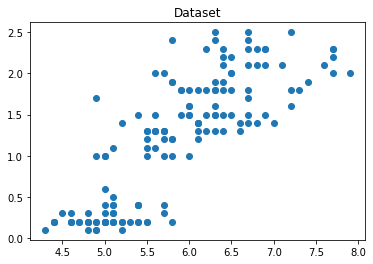

In [34]:
# [4.4] Code adapted from https://medium.com/analytics-vidhya/implementing-the-k-means-clustering-algorithm-in-python-using-datasets-iris-wine-and-breast-3c98668de474
from sklearn import datasets
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

iris1=pd.read_csv("iris.csv")
x1 = np.array(iris1['sepal_length'])
x2 = np.array(iris1['petal_width'])

plt.plot()
plt.title('Dataset')
plt.scatter(x1, x2)
plt.show()

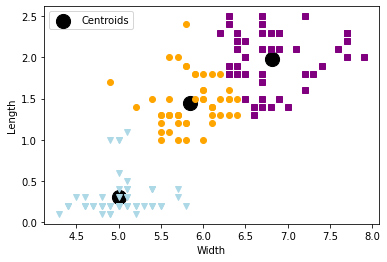

In [35]:
import numpy as np
# create new plot and data
from sklearn.cluster import KMeans
X = np.array(list(zip(x1, x2)))
colors = ['orange', 'lightblue', 'purple']
markers = ['o', 'v', 's']
plt.ylabel('Length')
kmeans = KMeans(n_clusters=3).fit(X)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'black', label = 'Centroids')


for i, l in enumerate(kmeans.labels_):
    plt.plot(x1[i], x2[i], color=colors[l], marker=markers[l])
plt.xlabel('Width')
plt.legend()
plt.show()

In [36]:
[4.5]
#ignore warnings
import warnings
warnings.filterwarnings('ignore')
# import basic libraries

import pandas as pd #for dataframes
import numpy as np #for math/statistics

#for graphs, visuals, etc. 
import matplotlib.pyplot as plt
import seaborn as sns

# import data set from preloaded sklearn datasets

#use this to import the preloaded iris datasets (https://scikit-learn.org/stable/datasets/index.html#toy-datasets)
from sklearn.datasets import load_iris

#save data information as variable
iris = load_iris()

In [37]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [38]:
#data initially comes as dictionary with array of lists, split between 'data' and 'target' values
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [39]:
import pandas as pd
data = pd.DataFrame(iris.data)

# shows first 5 rows of data from table
data.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [40]:
# Label the columns with their titles
data.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
data.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [41]:
# See just the target variable (class the iris belongs to)
target = pd.DataFrame(iris.target)
# Rename the column
target = target.rename(columns = {0: 'target'})
target.head()

,target
0,0
1,0
2,0
3,0
4,0


In [42]:
# 0=Setosa, 1=Versicolor, 3=Virginica
target.target.unique()

array([0, 1, 2])

In [43]:
#combine the data and target dataframes
#axis = 1 tells the dataframe to add the target dataframe as another column of the data dataframe, axis = 0 would add the values as another row on the bottom
df = pd.concat([data, target], axis = 1)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [44]:
[4.6]
from sklearn.preprocessing import scale
%matplotlib inline
plt.rcParams['figure.figsize'] = 7, 4
# import dataset
iris = datasets.load_iris()
X = scale (iris.data)
y = pd.DataFrame(iris.target)
variable_names = iris.feature_names
X [0:20,] # Print out first 20 records of x dataset, showing what iris dataset looks like from the inside

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ],
       [-0.53717756,  1.93979142, -1.16971425, -1.05217993],
       [-1.50652052,  0.78880759, -1.34022653, -1.18381211],
       [-1.02184904,  0.78880759, -1.2833891 , -1.3154443 ],
       [-1.74885626, -0.36217625, -1.34022653, -1.3154443 ],
       [-1.14301691,  0.09821729, -1.2833891 , -1.44707648],
       [-0.53717756,  1.47939788, -1.2833891 , -1.3154443 ],
       [-1.26418478,  0.78880759, -1.22655167, -1.3154443 ],
       [-1.26418478, -0.13197948, -1.34022653, -1.44707648],
       [-1.87002413, -0.13197948, -1.51073881, -1.44707648],
       [-0.05250608,  2.16998818, -1.45390138, -1.3154443 ],
       [-0.17367395,  3.09077525, -1.2833891 , -1.05217993],
       [-0.53717756,  1.

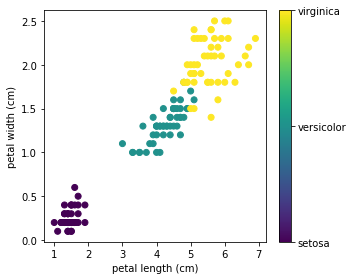

In [45]:
#Visualize the relationship between petal length and width on a scatterplot
x_index = 2
y_index = 3

# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

plt.figure(figsize=(5, 4))
plt.scatter(iris.data[:, x_index], iris.data[:, y_index], c=iris.target)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])

plt.tight_layout()
plt.show()

In [46]:
# [4.6]
# 0 refers to one particular iris, 1 to a different iris and 2 to another type.
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [47]:
# Build and run the model, initiate the k means object
#pre specify the number of clusters, 3 species types.  
clustering = KMeans (n_clusters=3, random_state=1) #[4.7]
# Call fit method from the model and pass in dataset, to calculate k-means clustering
clustering.fit(X)
clustering.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [48]:
# Find the center of the clusters
clustering.cluster_centers_

# Produces the below information

array([[-1.01457897,  0.85326268, -1.30498732, -1.25489349],
       [-0.05021989, -0.88337647,  0.34773781,  0.2815273 ],
       [ 1.13597027,  0.08842168,  0.99615451,  1.01752612]])

Text(0.5, 1.0, 'Prediction')

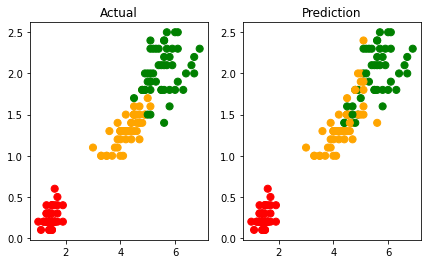

In [49]:
#Plotting model outputs
iris_df = pd.DataFrame (iris.data)
iris_df.columns = ['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']
y.columns=['Targets']
color_theme = np.array(['red', 'orange', 'green'])

plt.subplot(1,2,1)
plt.scatter(x=iris_df.Petal_Length, y=iris_df.Petal_Width, c=color_theme[iris.target], s=50)
plt.title('Actual')

plt.subplot(1,2,2)
plt.scatter(x=iris_df.Petal_Length, y=iris_df.Petal_Width, c=color_theme[clustering.labels_], s=50)
plt.title('Prediction')

In [50]:
from sklearn.metrics import confusion_matrix,classification_report # To elevate model
print("Classification Report:\n", (classification_report(y,clustering.labels_)))
#labels 0, 1 and 2 are listed, 0 gets full marks, the others are approx 75% accurate.

print ("Confusion Matrix:\n",(confusion_matrix(y,clustering.labels_)))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.74      0.78      0.76        50
           2       0.77      0.72      0.74        50

    accuracy                           0.83       150
   macro avg       0.83      0.83      0.83       150
weighted avg       0.83      0.83      0.83       150

Confusion Matrix:
 [[50  0  0]
 [ 0 39 11]
 [ 0 14 36]]


For my own interest,  I did a little more research and this generates a better result. https://towardsdatascience.com/classification-basics-walk-through-with-the-iris-data-set-d46b0331bf82

In [51]:
#Modelling
X = df.copy()
y = X.pop('target')

# 80% will be training data, remaining test data for model
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify = y)
# data is split into different groups
print('X train', X_train.shape)
print('y train', y_train.shape)
print('X test', X_test.shape)
print('y test', y_test.shape)

X train (120, 4)
y train (120,)
X test (30, 4)
y test (30,)


In [52]:
df.target.value_counts(normalize= True)
#the baseline for this model is 1/3, meaning that by chance you could randomly predict the correct class of an element 1 out of every 3 times

2    0.333333
1    0.333333
0    0.333333
Name: target, dtype: float64

In [53]:
# Logistic Regression Model
from sklearn.linear_model import LogisticRegression

#create the model instance
model = LogisticRegression()

#fit the model on the training data
model.fit(X_train, y_train)

LogisticRegression()

In [54]:
model.coef_ #The coef_ contain the coefficients for the prediction of each of the targets. It is also the same as if you trained a model to predict each of the targets separately.

array([[-0.51419563,  0.77925163, -2.38302657, -0.96075609],
       [ 0.30074374, -0.27662568, -0.15948399, -0.76810611],
       [ 0.2134519 , -0.50262595,  2.54251056,  1.72886221]])

In [55]:
predictions = model.predict(X_test)
predictions

array([2, 0, 1, 0, 0, 0, 2, 2, 2, 1, 0, 1, 2, 1, 2, 0, 2, 1, 1, 2, 1, 1,
       0, 0, 2, 1, 0, 0, 1, 1])

In [56]:
#compare predicted values with the actual scores
compare_df = pd.DataFrame({'actual': y_test, 'predicted': predictions})
compare_df = compare_df.reset_index(drop = True)
compare_df
#index 25 is the only time it incorrectly labeled the test data

,actual,predicted
0,2,2
1,0,0
2,1,1
3,0,0
4,0,0
5,0,0
6,2,2
7,2,2
8,2,2
9,1,1


In [57]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_test, predictions, labels=[2, 1, 0]),
             index=[2, 1, 0], columns=[2, 1, 0])

,2,1,0
2,9,1,0
1,0,10,0
0,0,0,10


In [58]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.91      1.00      0.95        10
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



[4.1] Wikipedia, (2020), Iris flower data set :https://en.wikipedia.org/wiki/Iris_flower_data_set#:~:text=It%20is%20sometimes%20called%20Anderson%27s,flowers%20of%20three%20related%20species, accessed December 2020.<br>

[4.2] Nick Cox, (2013), stats.exchange, What aspects of the “Iris” data set make it so successful as an example/teaching/test data set, https://stats.stackexchange.com/questions/74776/what-aspects-of-the-iris-data-set-make-it-so-successful-as-an-example-teaching, accessed December 2020.<br>

[4.3] Dr. Michael J. Garbade
, (2018), towards data science, Understanding K-means Clustering in Machine Learning, https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1, accessed December 2020.<br>  

[4.4] Kshitij Ved
, (2019), medium.com, Implementing the K-Means Clustering Algorithm in Python using Datasets -Iris, Wine, and Breast Cancer, Code adapted from https://medium.com/analytics-vidhya/implementing-the-k-means-clustering-algorithm-in-python-using-datasets-iris-wine-and-breast-3c98668de474, accessed December 2020.<br>

[4.5] Jewel Britton (2020), towards data science, Classification Basics: Walk-through with the Iris Data Set, Code adapted from https://towardsdatascience.com/classification-basics-walk-through-with-the-iris-data-set-d46b0331bf82 accessed December 2020.<br>

[4.6] Code adapted from https://www.youtube.com/watch?v=asW8tp1qiFQ&feature=emb_logo, accessed December 2020.<br>   

[4.7] Dragonfly Statistics, (2017), Scikit Learn - KMeans Clustering Analysis with the Iris Data Set, https://stackoverflow.com/questions/46108753/what-is-meant-by-the-term-random-state-in-kmeans-function-in-package-sklear, accessed December 2020.<br>
    
Further reading:

* Techopedia, Iris Flower Data Set, https://www.techopedia.com/definition/32880/iris-flower-data-set, accessed December 2020.<br>

* https://medium.com/@avulurivenkatasaireddy/exploratory-data-analysis-of-iris-data-set-using-python-823e54110d2d, accessed December 2020.<br>

* Venkata Sai Reddy Avuluri, (2019), medium.com, Exploratory Data Analysis of IRIS Data Set Using Python, https://github.com/TheReadingLamp/Sparks-Foundation-Internship/blob/main/From%20the%20given%20%E2%80%98Iris%E2%80%99%20dataset%2C%20predict%20the%20optimum%20number%20of%20clusters%20and%20represent%20it%20visually.ipynb, accessed December 2020.<br>

* https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html, accessed December 2020.<br>

* (2019), MULTI-CLASS LOGISTIC CLASSIFICATION AND K-MEANS CLUSTERING OF IRIS​ DATA, http://www.philipkalinda.com/ds3.html, accessed December 2020.<br>